In [1]:
%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders, dataset_plot
from train import *
from test_function import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

## Dataset generation

In [2]:
# create dataset (optional)
x_range = np.array([3.,3.,np.pi])
u_range = np.array([1.5,0.5])
SimLength=20
Ntraj = 10000
Ts=0.1
path = produce_dataset(x_range,u_range,SimLength,Ntraj,Ts)
sys.stdout = initial_out
print(path)

Start simulating...


100%|██████████| 2000/2000 [00:01<00:00, 1777.36it/s]



Dataset produced.
Dataset saved.
./dataset/state-[3.         3.         3.14159265]_input-[1.5 0.5]_2.0x10000_Ts_0.1


<IPython.core.display.Javascript object>


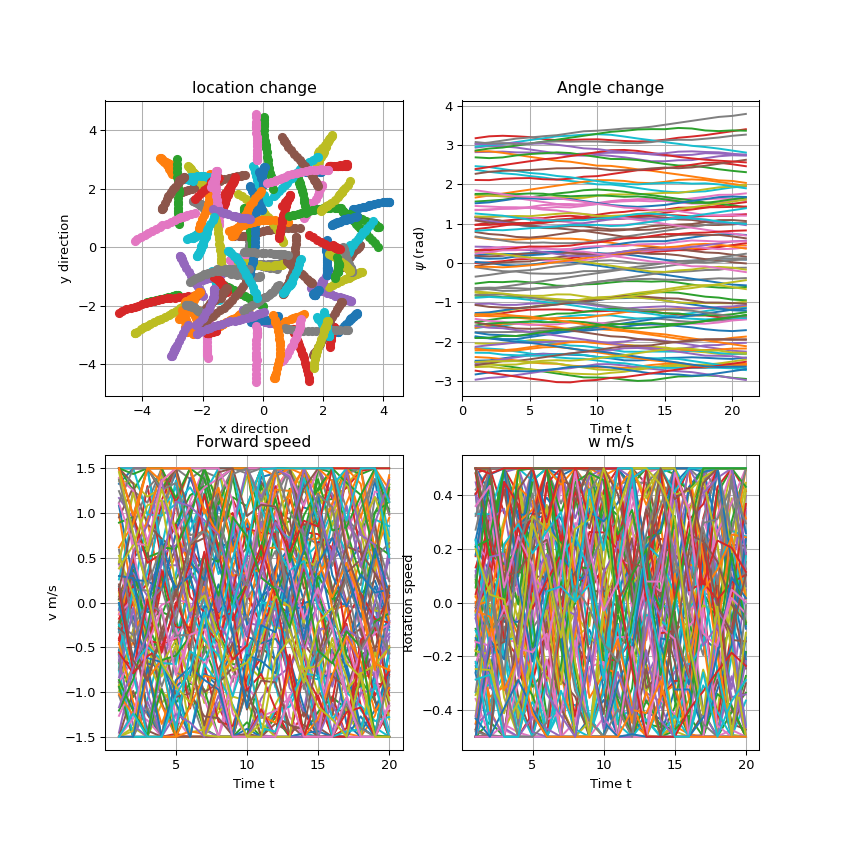

In [3]:
path = './dataset/state-[3.         3.         3.14159265]_input-[1.5 0.5]_2.0x10000_Ts_0.1'
dataset_plot(path,num=100)

## Model training

In [3]:
initial_out = sys.stdout
# get parameters
path = './dataset/state-[2.         2.         3.14159265]_input-[1.5 0.5]_2.0x10000_Ts_0.1'
K = 10
arg = {
    'encoder':[3,32,64,K],
    'decoder':[K+3,128,64,32,3],
    'hyper':[1.0,3.0,0.3,1e-7,1e-7,1e-7,10]
}

epochs = 2
batch_size = 10
# get dataloaders
train_loader, val_loader, test_loader = get_dataloaders(path,batch_size)

# start training
file_name = train_the_model(train_loader, val_loader, arg, batch_size, epochs)
# get test result
test_the_model(test_loader, file_name)
print(file_name)
save_model_as_numpy(file_name)
params = np.load('./numpy_weight/'+file_name+'.npy',allow_pickle=True).item()
A = 0.5*params['K.layer.weight']*params['K.layer.mask']
print(A)

Epoch 1:  10%|▉         | 59/600 [00:08<01:18,  6.91it/s, loss=138.443]


KeyboardInterrupt: 

In [4]:
AA = 0.5*A[:,:-2]
for i in range(AA.shape[0]-1):
    AA[i,i+1] = 1
print(AA)

[[-0.10188004  1.         -0.          0.         -0.          0.
  -0.          0.         -0.          0.          0.        ]
 [-0.         -0.02735717  1.         -0.          0.         -0.
  -0.          0.         -0.         -0.         -0.        ]
 [ 0.          0.          0.35167205  1.          0.          0.
  -0.         -0.         -0.          0.         -0.        ]
 [ 0.          0.         -0.          0.02063536  1.          0.
  -0.          0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.26264724  1.
   0.          0.          0.         -0.          0.        ]
 [ 0.          0.         -0.          0.         -0.         -0.18553801
   1.         -0.         -0.         -0.          0.        ]
 [ 0.         -0.         -0.         -0.          0.         -0.
   0.17571156  1.          0.          0.         -0.        ]
 [-0.          0.          0.          0.         -0.          0.
  -0.         -0.062012

In [3]:
# start training
file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
# get test result
save_model_as_numpy(file_name)

en.layers.0.0.weight : torch.Size([32, 3])
en.layers.0.0.bias : torch.Size([32])
en.layers.1.0.weight : torch.Size([64, 32])
en.layers.1.0.bias : torch.Size([64])
en.layers.2.0.weight : torch.Size([8, 64])
en.layers.2.0.bias : torch.Size([8])
de.layers.0.1.weight : torch.Size([128, 11])
de.layers.0.1.bias : torch.Size([128])
de.layers.1.1.weight : torch.Size([64, 128])
de.layers.1.1.bias : torch.Size([64])
de.layers.2.1.weight : torch.Size([32, 64])
de.layers.2.1.bias : torch.Size([32])
de.layers.3.1.weight : torch.Size([3, 32])
de.layers.3.1.bias : torch.Size([3])
K.layer.mask : torch.Size([11, 13])
K.layer.weight : torch.Size([11, 13])


In [5]:
params = np.load('./numpy_weight/'+file_name+'.npy',allow_pickle=True).item()
A = params['K.layer.weight']*params['K.layer.mask']
Ae = np.linalg.eigvals(A[:,:-2])
print(Ae)

[ 0.05616682  0.71001095  1.0000248   0.99422693 -0.08533086  1.0157245
  0.02008919  0.99972236  0.99961853  1.0011988   0.9844466 ]


### Varying batch size

In [7]:
path = './dataset/state-[3.         3.         3.14159265]_input-[1.5 0.5]_2.0x10000_Ts_0.1'
file_names = [
    'unmasked-encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10',
]
result_sample(path,file_names,index=252)

RuntimeError: Error(s) in loading state_dict for Koopman:
	Unexpected key(s) in state_dict: "K.layer.mask". 

In [3]:
initial_out = sys.stdout
# get parameters
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
K = 8
arg = {
    'encoder':[3,32,64,K],
    'decoder':[K+3,128,64,32,3],
    'hyper':[1.0,3.0,0.3,1e-7,1e-7,1e-7,10]
}

epochs = 1000
model_num = 0

for batch_size in [10,100,1000]:
    # get dataloaders
    model_num += 1
    train_loader, val_loader, test_loader = get_dataloaders(path,batch_size)
    
    # start training
    print('Model '+str(model_num)+':')
    file_name = train_the_model(train_loader, val_loader, arg, batch_size, epochs)
    # get test result
    test_the_model(test_loader, file_name)
    print(file_name)

Model 1:


  0%|          | 0/6000 [00:00<?, ?it/s]

Trainer created.


  0%|          | 0/600 [00:00<?, ?it/s]


General loss: 0.03666893334966153.

MSE loss: 0.00016562834407159245.
encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10
Model 2:
Trainer created.


Epoch 225: 100%|██████████| 600/600 [00:36<00:00, 16.46it/s, loss=0.269]


Epoch 449: 100%|██████████| 600/600 [00:35<00:00, 16.67it/s, loss=0.241]


  0%|          | 0/60 [00:00<?, ?it/s]


General loss: 0.06103479964658618.

MSE loss: 0.0005880082475778182.
encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_100
Model 3:
Trainer created.


Epoch 231: 100%|██████████| 60/60 [00:05<00:00, 10.56it/s, loss=0.610]


100%|██████████| 20/20 [00:02<00:00,  7.41it/s]


General loss: 0.19142308384180068.

MSE loss: 0.0028344479273073376.
encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_1000


['\n', 'General loss: 0.04146364192438778.\n', '\n', 'MSE loss: 0.0006183696090664853.\n']
['\n', 'General loss: 0.03666893334966153.\n', '\n', 'MSE loss: 0.00016562834407159245.\n']
['\n', 'General loss: 0.06103479964658618.\n', '\n', 'MSE loss: 0.0005880082475778182.\n']
['\n', 'General loss: 0.19142308384180068.\n', '\n', 'MSE loss: 0.0028344479273073376.\n']


<IPython.core.display.Javascript object>


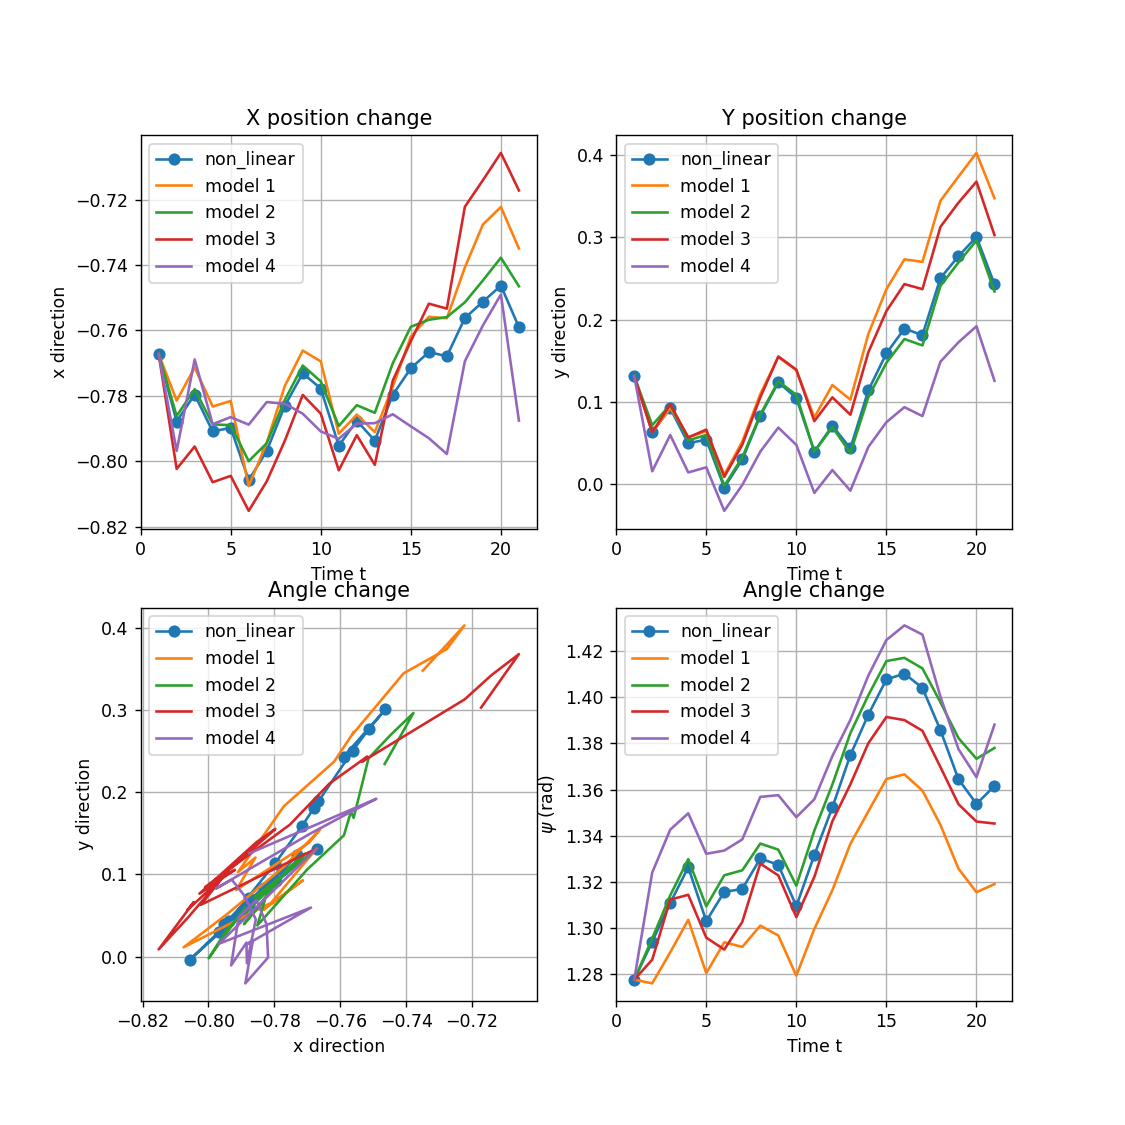

In [2]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
file_names = [
    'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_1',
    'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10',
    'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_100',
    'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_1000',
]
for file_name in file_names:
    f = open("./results/"+file_name+".txt", "r")
    print(f.readlines())
result_sample(path,file_names,index=7921)

### Preparation

In [2]:
# get dataloaders
batch_size = 100
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
train_loader, val_loader, test_loader = get_dataloaders(path,batch_size)

### Initial baseline - from paper

### Varying length

['\n', 'General loss: 0.05351579040288925.\n', '\n', 'MSE loss: 0.007468976825475693.\n']
['\n', 'General loss: 0.08226887211203575.\n', '\n', 'MSE loss: 0.005486347316764295.\n']
['\n', 'General loss: 0.07708018459379673.\n', '\n', 'MSE loss: 0.004036436637397856.\n']
['\n', 'General loss: 0.12063321247696876.\n', '\n', 'MSE loss: 0.0038514290819875894.\n']


<IPython.core.display.Javascript object>


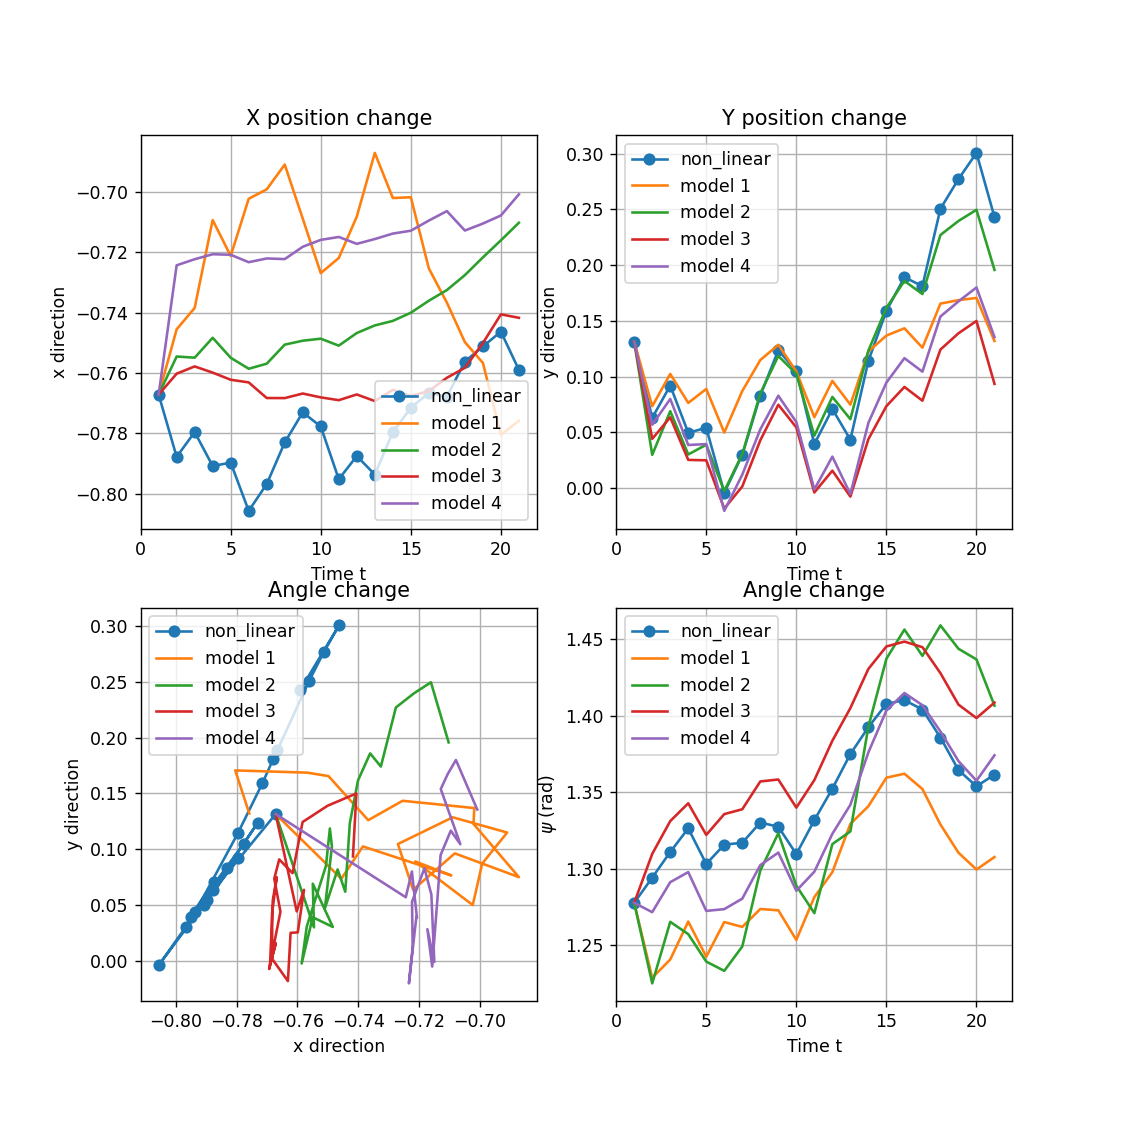

In [6]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
file_names = [
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 2]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 6]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 10]_batch_1000',
]
for file_name in file_names:
    f = open("./results/"+file_name+".txt", "r")
    print(f.readlines())
result_sample(path,file_names,index=7921)

### Varing regularisation

['\n', 'General loss: 0.0696896780282259.\n', '\n', 'MSE loss: 0.0027522539952769876.\n']
['\n', 'General loss: 0.09892170764505863.\n', '\n', 'MSE loss: 0.006059048534370959.\n']
['\n', 'General loss: 0.07708018459379673.\n', '\n', 'MSE loss: 0.004036436637397856.\n']
['\n', 'General loss: 0.0830964632332325.\n', '\n', 'MSE loss: 0.002940229629166424.\n']


<IPython.core.display.Javascript object>


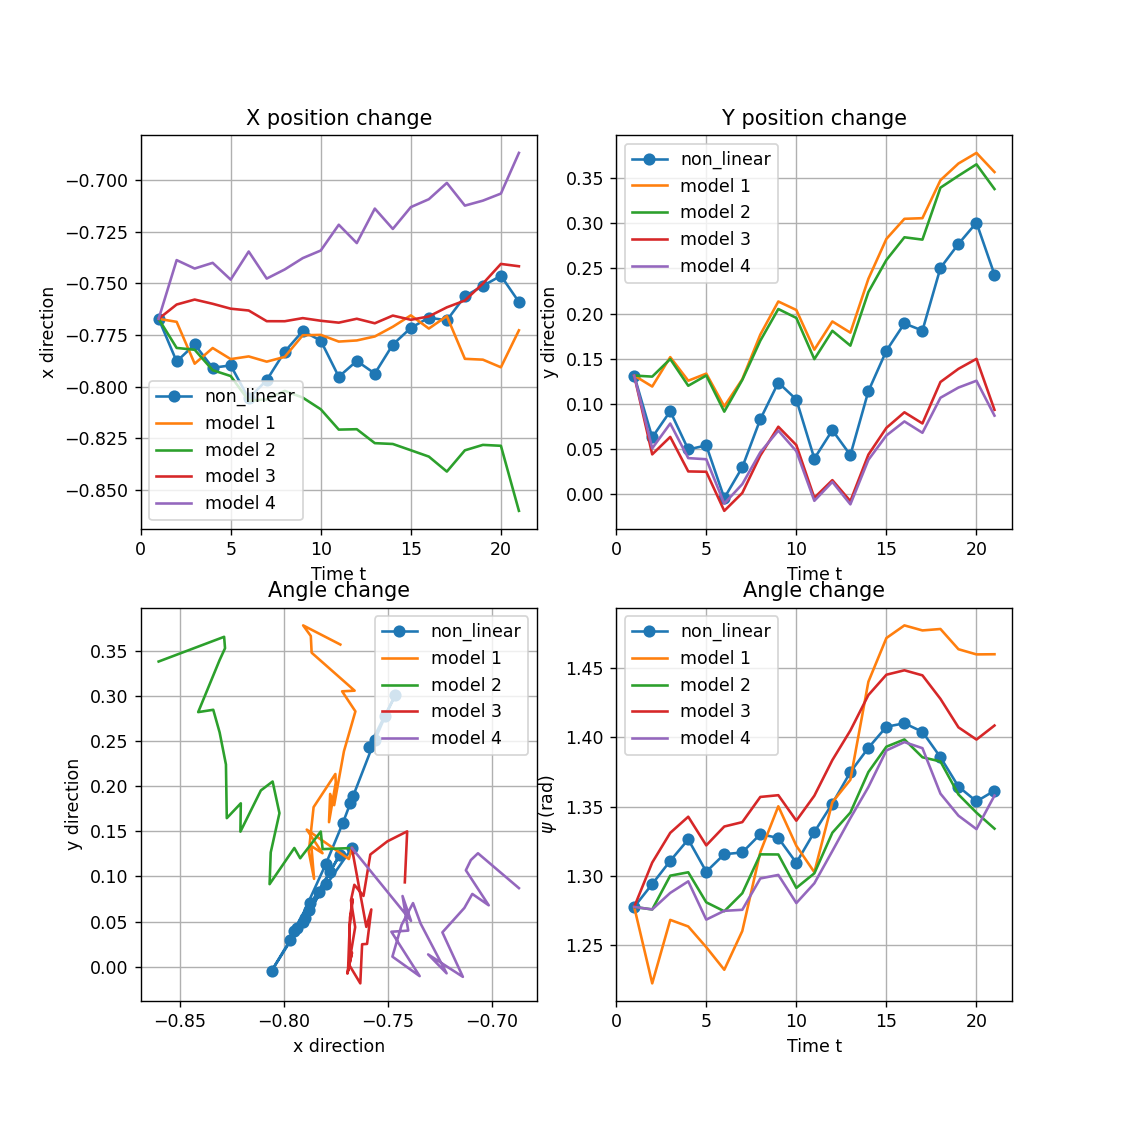

In [7]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
file_names = [
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1.0000000000000004e-07, 1.0000000000000004e-07, 1.0000000000000004e-07, 6]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1.0000000000000005e-08, 1.0000000000000005e-08, 1.0000000000000005e-08, 6]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 6]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1.0000000000000006e-10, 1.0000000000000006e-10, 1.0000000000000006e-10, 6]_batch_1000',
]
for file_name in file_names:
    f = open("./results/"+file_name+".txt", "r")
    print(f.readlines())
result_sample(path,file_names,index=7921)

### Varying different loss

['\n', 'General loss: 0.07010050825774669.\n', '\n', 'MSE loss: 0.006608859519474208.\n']
['\n', 'General loss: 0.07708018459379673.\n', '\n', 'MSE loss: 0.004036436637397856.\n']
['\n', 'General loss: 0.13922526091337203.\n', '\n', 'MSE loss: 0.002716852817684412.\n']
['\n', 'General loss: 0.4192204162478447.\n', '\n', 'MSE loss: 0.0028046704013831914.\n']


<IPython.core.display.Javascript object>


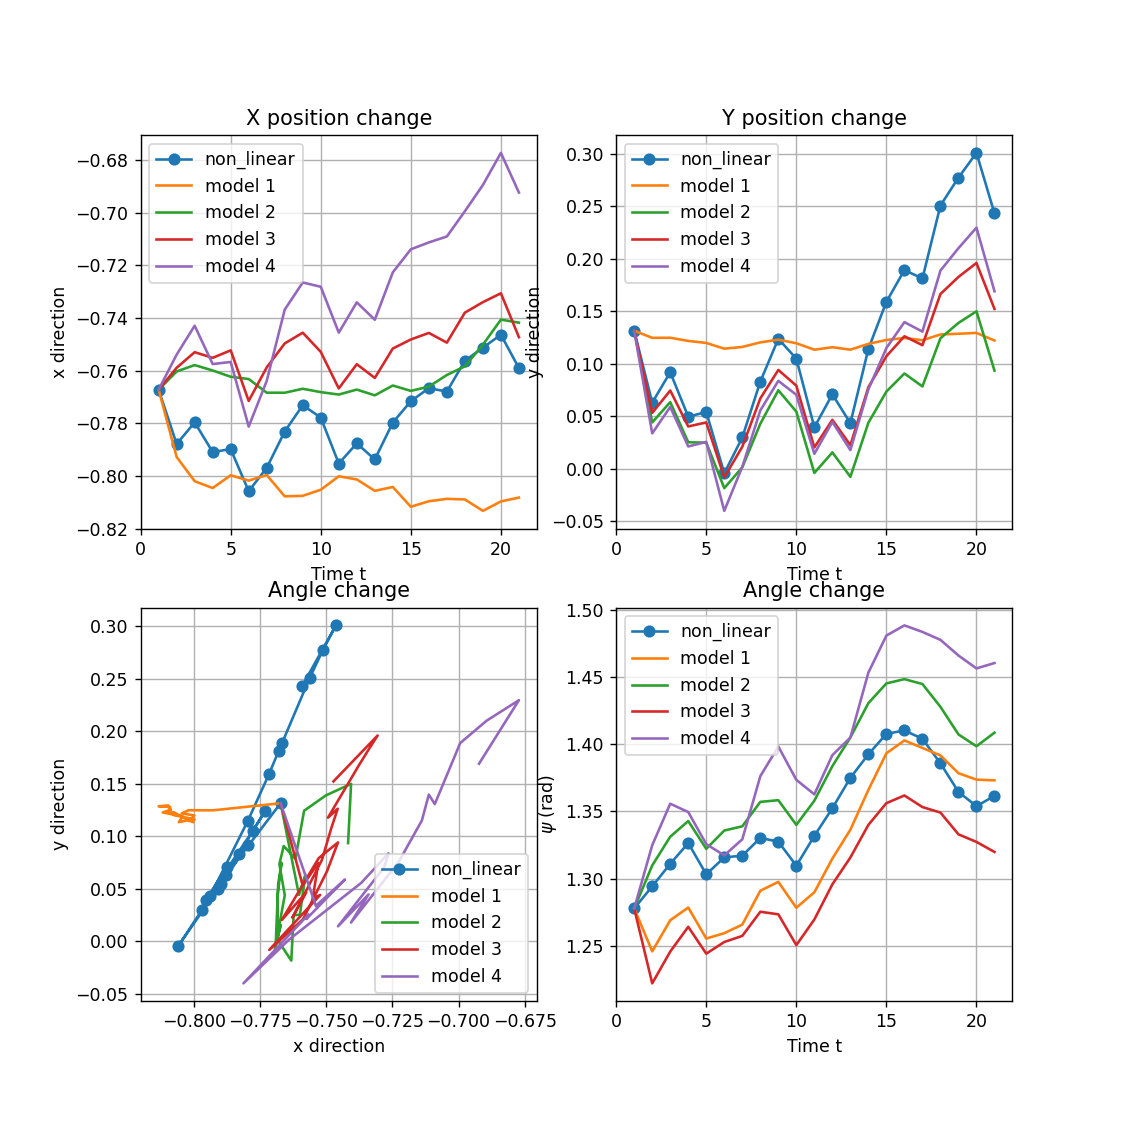

In [8]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
file_names = [
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 0.5, 0.3, 1e-09, 1e-09, 1e-09, 6]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 6]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-09, 1e-09, 1e-09, 6]_batch_1000',
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 10.0, 0.3, 1e-09, 1e-09, 1e-09, 6]_batch_1000',
]
for file_name in file_names:
    f = open("./results/"+file_name+".txt", "r")
    print(f.readlines())
result_sample(path,file_names,index=7921)

### Varying lifted state

['\n', 'General loss: 0.08226887211203575.\n', '\n', 'MSE loss: 0.005486347316764295.\n']
['\n', 'General loss: 0.06863915957510472.\n', '\n', 'MSE loss: 0.0029915671097114683.\n']
['\n', 'General loss: 0.07326001077890396.\n', '\n', 'MSE loss: 0.004515083762817085.\n']
['\n', 'General loss: 0.0696195524185896.\n', '\n', 'MSE loss: 0.0036112417466938494.\n']


<IPython.core.display.Javascript object>


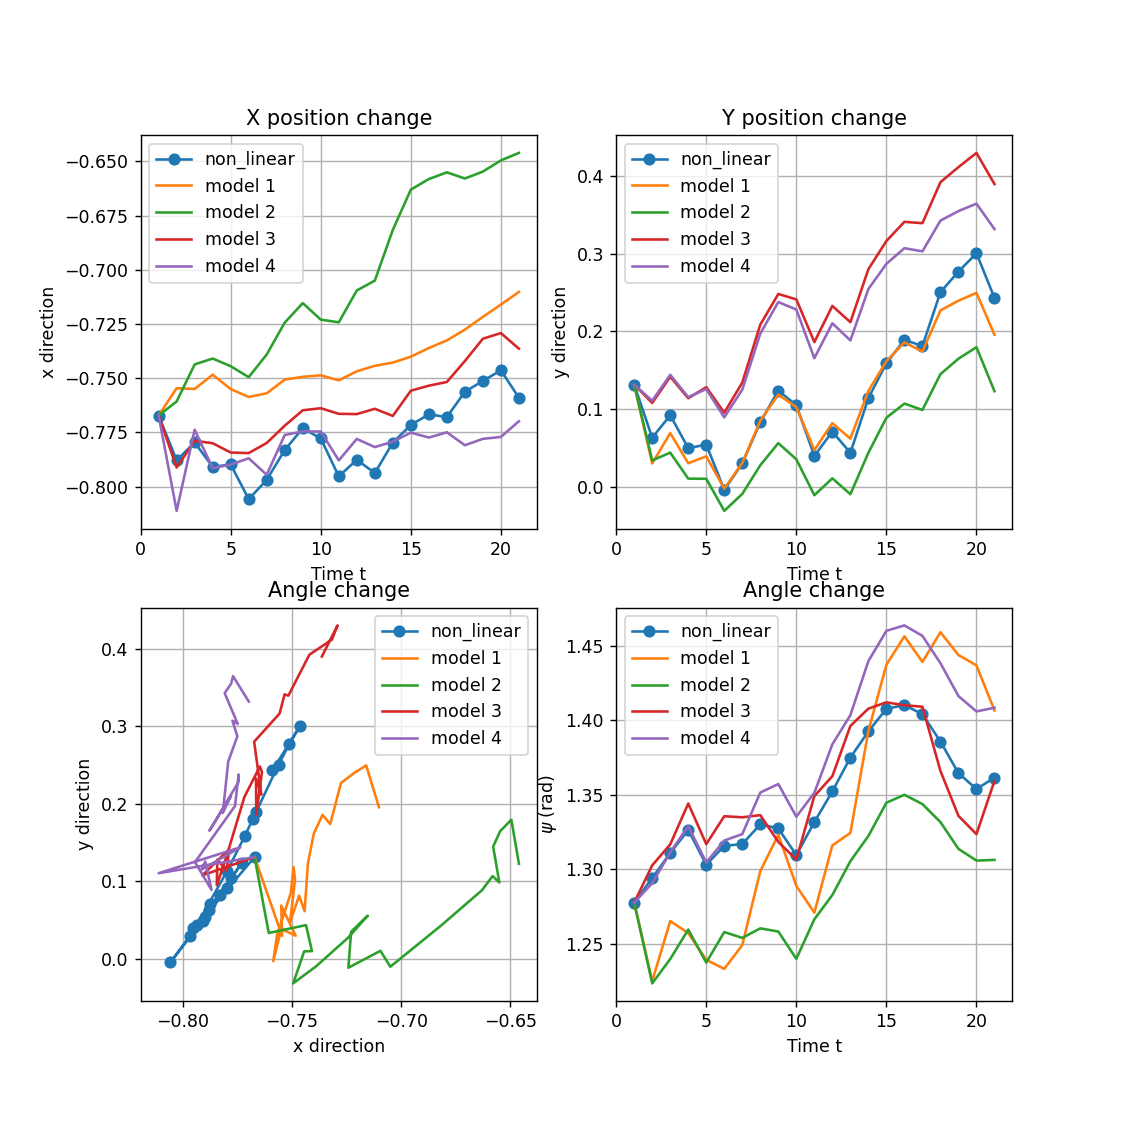

In [9]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
file_names = [
    'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_1000',
    'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_1000',
    'encoder_[3, 32, 64, 12]_decoder_[15, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_1000',
    'encoder_[3, 32, 64, 18]_decoder_[21, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_1000',
]
for file_name in file_names:
    f = open("./results/"+file_name+".txt", "r")
    print(f.readlines())
result_sample(path,file_names,index=7921)

## Result Analysis

['\n', 'General loss: 0.03666893334966153.\n', '\n', 'MSE loss: 0.00016562834407159245.\n']


<IPython.core.display.Javascript object>


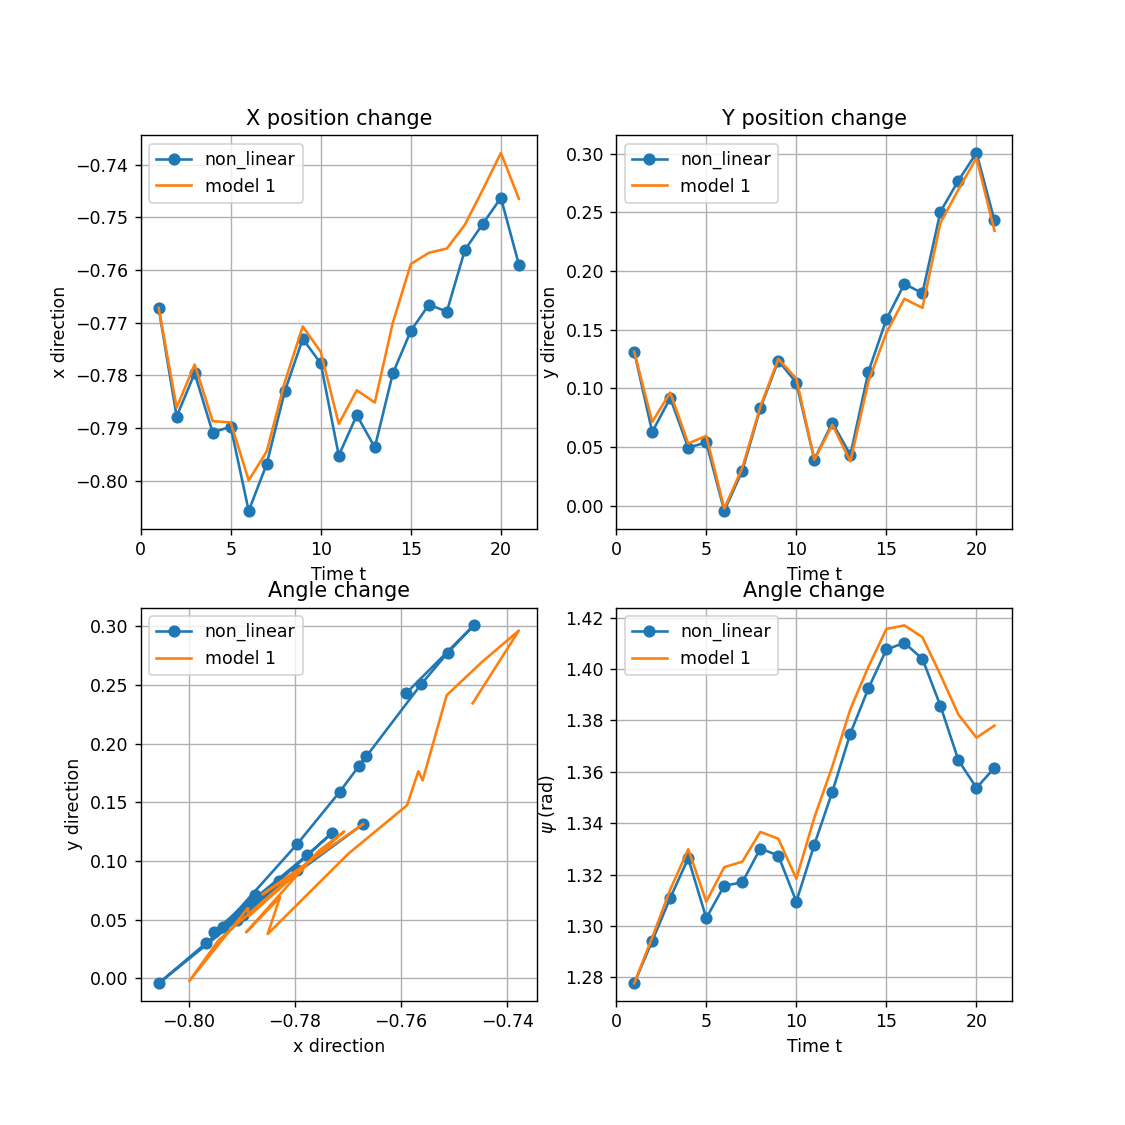

In [11]:
path = './dataset/state-[2. 2. 3.]_input-[1.5 0.5]_2.0x100000_Ts_0.1'
file_names = [
    'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10',
]
for file_name in file_names:
    f = open("./results/"+file_name+".txt", "r")
    print(f.readlines())
result_sample(path,file_names,index=7921)

In [ ]:
def save_model_as_numpy(file_name):
    # get parameters
    arguments = file_name.split('_')
    en = list(map(int,arguments[1][1:-1].split(', ')))
    de = list(map(int,arguments[3][1:-1].split(', ')))
    hyper = list(map(float,arguments[5][1:-1].split(', ')))

    # set model
    model = Koopman(en,de)
    saved_model_path = './weight/{}_checkpoint.pt'.format(file_name)
    checkpoint = Checkpoint(saved_model_path)
    model=checkpoint.load_saved_model(model)
    
    # create dictionary
    param = {}
    for name,parameters in model.named_parameters():
        print(name,':',parameters.size())
        param[name]=parameters.detach().numpy()
    print(param['K.layer.weight'])
    # save as numpy file\
    np.save('./numpy_weight/'+file_name,param)
    
file_name = 'newnew-unmasked-encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
save_model_as_numpy(file_name)